<a href="https://colab.research.google.com/github/muskanthakur0221/The-Sparks-Foundation/blob/main/Muskan_Thakur(Task1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **TASK-1**

# **Muskan Thakur**

**Prediction using Supervised ML**

### **Importing libraries**

In [35]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt  

### **Importing dataset**

In [36]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("First five rows of the dataset")
df.head(5)

First five rows of the dataset


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### **EDA to gain insights from the data**

In [37]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Positive Linear Regression

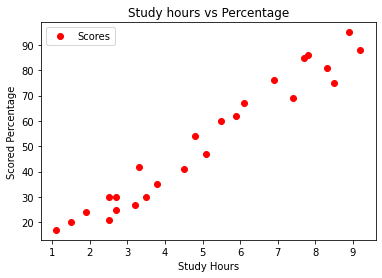

In [40]:
df.plot(x='Hours', y='Scores', style='ro')  
plt.title('Study hours vs Percentage')  
plt.xlabel('Study Hours')  
plt.ylabel('Scored Percentage')  
plt.show()

### **Data Preparation**

No null values in the dataset

In [7]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

Data in attribute and labels

In [9]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

Test and Train dataset 

In [10]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [17]:
print("X_train shape",X_train.shape)
print("Y_train shape",y_train.shape)
print("X_test shape",X_test.shape)
print("Y_test shape",y_test.shape)

X_train shape (20, 1)
Y_train shape (20,)
X_test shape (5, 1)
Y_test shape (5,)


### **Model Selection and Training**

In [18]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
regressor.coef_

array([9.91065648])

In [23]:
regressor.intercept_

2.018160041434662

In [24]:
regressor.score(X_test,y_test)

0.9454906892105354

Linear regression line

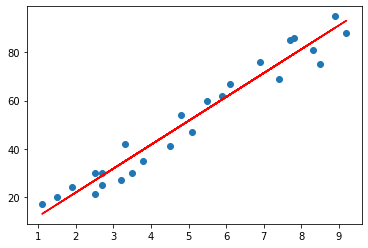

In [27]:
line = regressor.coef_*X+regressor.intercept_
plt.scatter(X, y)
plt.plot(X, line,color="red");
plt.show()

### **Predictions**

In [28]:
print(X_test) 
y_pred = regressor.predict(X_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [29]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [30]:
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


### **Model Evaluation**

**Mean Absolute Error, Mean Squared Error, Root Mean Squared Error**

In [31]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', 
      metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', 
      np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 2.0454485813637513
